<h1><font color='blue'> 8E:Implementing Decision Function of SVM RBF Kernel </font></h1>

<h1><font color='blue'> 8F: Implementing Platt Scaling to find P(Y==1|X) </font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

## Task E

In [80]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import sys
from sklearn.model_selection import GridSearchCV
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)          #show decimal places in numpy: https://stackoverflow.com/a/32263033/17345549
np.set_printoptions(suppress=True)        #avoid scientific notation :https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html?highlight=formatter

In [81]:
#generating dataset
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [82]:
#splitting data into train,crossvalidation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25)

## SVM with train data

In [84]:
#fitting traindata with support vector classifier
svm=SVC(gamma=0.001, C=100)
svm.fit(X_train,y_train)


SVC(C=100, gamma=0.001)

In [85]:
support_vectors=svm.support_vectors_ #getting Support vectors for our trained model
ya=svm.dual_coef_                     #dual_coeff hold the product of y and a
intercept=svm.intercept_              #getting the intercept

In [86]:
#writing our custom decision function fro RBF KERNEL/GAUSSIAN KERNEL svm
def decision_function(support_vectors,ya,X_cv,intercept,gamma):
    predicted=[]
    
    for x_q in X_cv:                                                           #for each datapoint in Xcv
        s=0
        for idx,each_sv in enumerate(support_vectors):                         #for each support vectors
            s+=ya[0][idx]*np.exp(-gamma*np.linalg.norm(each_sv - x_q) ** 2 )   #prediction formula
        s=s+intercept
        predicted=np.append(predicted,s)

    return predicted

#### make prediction on X_cv

In [87]:
our_Prediced_CV_y=decision_function(support_vectors,ya,X_cv,intercept,gamma=0.001)#getting our prediced y for X_cv data

sklearn_predited_CV_y=svm.decision_function(X_cv)                                 #getting sklearn's svc prediction of y for X_cv data

In [88]:
#print to check whether our implementation works as good as sklearns implementation
print(our_Prediced_CV_y)

[-4.222  -1.7992 -0.9023  3.1875 -4.5379 -1.4901 -2.2874  3.4101 -3.8576
 -2.0655 -2.2346  2.3291  0.8228 -3.207  -0.12    1.4664 -1.5481  0.4787
 -1.2393 -2.4651 -2.1121 -3.4784  0.7377 -1.4448 -4.1376  1.7319 -1.2062
  0.69    2.2297  1.4439 -2.9107  0.3471  1.7427  1.9081 -2.0321 -2.9724
  1.9181  1.8833 -3.2304 -3.5096  0.2469 -1.3192 -1.5229 -2.5659 -2.8968
 -2.6942 -4.0976 -2.8596 -3.3219 -1.6731  1.7599 -0.2305 -3.391  -3.0915
 -1.4975 -4.3143 -3.8562 -2.225   2.7581  1.8459 -2.7246  1.9752 -2.7957
 -2.0971 -2.6849  0.384  -3.1416 -0.2982  1.6769 -3.8401 -2.824  -2.5233
  1.9121 -4.1093 -2.7992 -2.5886  0.3757  1.6818  1.2908  2.8399 -4.6471
  1.1602  0.0757 -3.1137 -3.2297 -1.0368  1.8852  1.8161 -1.9506 -3.4835
 -3.4449 -0.2841 -1.1326 -3.8028  1.8205 -1.8768 -0.4398 -2.3961 -3.0015
  2.6465 -3.5251 -2.0916  2.4988 -2.1559 -2.8897 -3.0914 -2.557   1.3397
 -0.7346 -3.2437 -2.1941 -3.2689 -2.6945 -3.511  -3.4421  1.8781 -2.032
 -2.7699 -2.8114 -2.513  -1.4655 -1.7036 -0.6792 -3.

In [89]:
print(sklearn_predited_CV_y)

[-4.222  -1.7992 -0.9023  3.1875 -4.5379 -1.4901 -2.2874  3.4101 -3.8576
 -2.0655 -2.2346  2.3291  0.8228 -3.207  -0.12    1.4664 -1.5481  0.4787
 -1.2393 -2.4651 -2.1121 -3.4784  0.7377 -1.4448 -4.1376  1.7319 -1.2062
  0.69    2.2297  1.4439 -2.9107  0.3471  1.7427  1.9081 -2.0321 -2.9724
  1.9181  1.8833 -3.2304 -3.5096  0.2469 -1.3192 -1.5229 -2.5659 -2.8968
 -2.6942 -4.0976 -2.8596 -3.3219 -1.6731  1.7599 -0.2305 -3.391  -3.0915
 -1.4975 -4.3143 -3.8562 -2.225   2.7581  1.8459 -2.7246  1.9752 -2.7957
 -2.0971 -2.6849  0.384  -3.1416 -0.2982  1.6769 -3.8401 -2.824  -2.5233
  1.9121 -4.1093 -2.7992 -2.5886  0.3757  1.6818  1.2908  2.8399 -4.6471
  1.1602  0.0757 -3.1137 -3.2297 -1.0368  1.8852  1.8161 -1.9506 -3.4835
 -3.4449 -0.2841 -1.1326 -3.8028  1.8205 -1.8768 -0.4398 -2.3961 -3.0015
  2.6465 -3.5251 -2.0916  2.4988 -2.1559 -2.8897 -3.0914 -2.557   1.3397
 -0.7346 -3.2437 -2.1941 -3.2689 -2.6945 -3.511  -3.4421  1.8781 -2.032
 -2.7699 -2.8114 -2.513  -1.4655 -1.7036 -0.6792 -3.

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

## TASK F

#### Converting y_cv to the platt scaling's required probabilily values

In [90]:
N_pos=np.count_nonzero(y_train)    #count number of positive points in y_train data
N_neg=y_train.shape[0]-N_pos        #count number of negative points in y_train data
y_pos=(N_pos+1)/(N_pos+2)           #calculate y+ as mentioned in the formula for platt scaling
y_neg=1/(N_neg+2)                   #calculate y- as mentioned in the formula for platt scaling
print(y_pos)

0.998898678414097


In [91]:
modified_y_cv=np.where(y_cv==1,y_pos,y_neg)   #replace element in numpy: https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [92]:
# Sklearn's SGD algorithm doesn't support the real valued labels...so we can check that it throws error here....so use custom SGD function

lr=SGDClassifier(loss="log_loss",alpha=0.001,eta0=0.001)
lr.fit(our_Prediced_CV_y.reshape(-1, 1),modified_y_cv)

ValueError: Unknown label type: (array([0.0005, 0.9989]),)

### Using custom SGD

In [ ]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    # zeros_like function to initialize zero: https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    w=np.zeros_like(row_vector)
    b=0      #initializing bias to zero
    return w,b

In [ ]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    if z >= 0:                          #to avoid overflow problem : referene taken from: https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
        z = np.exp(-z)            
        return 1 / (1 + z)
    else:
        z = np.exp(z)
        return z / (1 + z)

In [ ]:
def logloss(y_true,y_pred):
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/

    loss =-np.mean(y_true*(np.log10(y_pred+1e-9)) + (1-y_true)*np.log10(1-y_pred+1e-9))   #to avoid division by zero error add 1e-9:reference taken from- #https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/
    return loss

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x*(y-sigmoid(np.dot(w.T,x)+b))+((alpha/N)*w)
    return dw

In [ ]:
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y-sigmoid(np.dot(w,x)+b)   
     return db

In [ ]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict=np.append(predict,sigmoid(z))
    return np.array(predict)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tqdm

In [100]:
def train(X_cv,y_cv,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    epoch_tracker=[]
    train_loss = []
    w,b = initialize_weights(X_cv[0]) # Initialize the weights
    #code to perform SGD
    for i in range(epochs):                           # for every epoch
        for idx,x in enumerate(X_cv) :             # for every data point(X_train,y_train)
            dw=gradient_dw(x,y_cv[idx],w,b,alpha,len(X_cv))  #computing gradient w.r.to w 
            db=gradient_db(x,y_cv[idx],w,b)        #computing gradient w.r.to b 
            w+=eta0*dw                                #update w  #Here eta0 is learning rate
            b+=eta0*db                                #update b
            
        y_pred_tr=pred(w,b,X_cv)           #preding y for the given x_train using logistic function
        tr_loss=logloss(y_cv,y_pred_tr)    #calculating log loss for train datapoints
        train_loss.append(tr_loss)
        epoch_tracker.append(i)

        
        if i>2:
            if abs(train_loss[-1]-train_loss[-2]) <= 1e-3:     #if the first 3 decimal places of train loss does not change for the consequent epoch,stop the training process since data is fitted to model very well
                break
                
    plt.plot(epoch_tracker,train_loss)  #plot to check how trainloss reducing as number of epochs increases
    plt.xlabel("Number of epochs")
    plt.ylabel("Train loss")
    plt.title("Train loss vs number of epochs")
    plt.grid()
    plt.show()
        

    return w,b,train_loss

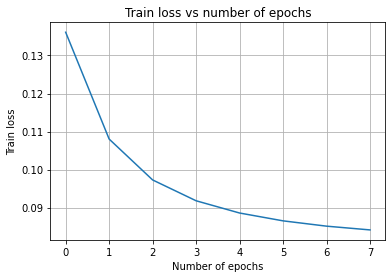

In [101]:
alpha=0.001          #taking hyperparameter(but hyperparameter is not yet tuned)
eta0=0.001
epochs=30

#fitting the calibation model with predicted y_cv and actual y_cv 
w,b,train_loss=train(our_Prediced_CV_y.reshape(-1, 1),modified_y_cv,epochs,alpha,eta0)

In [102]:
print(w.shape)          #shape of weight vector

(1,)


##### Transform X_test data using SVM and calibrated model sequentially

In [103]:
#transforming test data by
#1)first predicting  the uncalibated prob of X_test by passing it through decision function of svm classifier
#2)then passing the predicted uncalibated prob of X_test through pred function of calibation(log.reg) model to get calibrated prediction on X_test

#SVM
non_calibrated_y_pred_test = decision_function(support_vectors,ya,X_test,intercept,gamma=0.001) #1) step number 1

#Calibration(sigmoidal)
calibrated_y_pred_test = pred(w,b,non_calibrated_y_pred_test) # step numeber 2

In [104]:
print(non_calibrated_y_pred_test)   #-ve sign indicated correspoing pt in X_test belongs to -ve class and vice versa

[ 1.6036 -1.5517 -3.3686 -2.7721 -0.634  -0.6123 -1.1856 -3.5855 -1.8323
  1.46    1.7033 -1.6195 -3.1906  1.8562  1.3528 -1.8838  2.5774  1.5775
  1.4923 -1.0626  2.1438 -1.1047 -2.497   2.5943  0.9765 -2.9792 -1.6881
 -3.008  -1.6357 -0.5173 -2.9984 -1.5541 -0.8679  1.9308  0.2925  1.4182
  1.8559  1.8586 -5.1731 -0.6487  1.4211 -0.8709  1.6896 -4.0335  0.0067
  1.1069 -1.9055 -1.0466 -2.8478 -0.8643 -1.8107 -2.8005 -3.7976 -1.0132
 -0.1569 -4.3477 -3.2284  2.0389  1.1883 -2.4442 -3.5124 -0.9733  0.4819
  2.1227  0.8163 -3.5684 -2.539  -2.5695 -1.3938  0.9293 -3.1422  0.1211
  1.1804 -2.0796 -4.2785 -2.7548 -2.0829 -1.4388  0.1428 -3.1631 -5.0098
 -4.0362 -2.7443 -1.88   -1.5936 -0.0702 -2.5288 -2.3328 -1.544  -0.7295
  1.725  -0.4378 -1.5648 -2.0767 -3.3415 -3.1107  0.9975 -3.7706  2.007
  0.597  -1.8126  1.7127  2.0019  2.2474 -4.7822 -1.9178 -2.4299  0.4107
 -3.2284 -3.5194 -2.6912 -3.571   1.9819 -1.7832 -3.3056  2.5535 -1.9896
 -1.9553  2.2679  1.3074  1.1216 -2.213  -2.9755  1.

In [105]:
print(calibrated_y_pred_test)    #in the range between 0 and 1

[0.8781 0.092  0.0086 0.0191 0.2593 0.265  0.1425 0.0064 0.0648 0.8557
 0.8918 0.0846 0.0109 0.9102 0.8369 0.0607 0.9641 0.8742 0.861  0.164
 0.9373 0.1564 0.0275 0.9649 0.7553 0.0145 0.0777 0.014  0.0829 0.2907
 0.0141 0.0917 0.2033 0.9181 0.5505 0.8486 0.9101 0.9104 0.0008 0.2555
 0.8491 0.2027 0.89   0.0035 0.4542 0.7863 0.0591 0.167  0.0173 0.2041
 0.0666 0.0184 0.0048 0.1734 0.4001 0.0023 0.0104 0.9284 0.8042 0.0294
 0.0071 0.1812 0.6126 0.9356 0.7131 0.0066 0.026  0.025  0.1114 0.7433
 0.0117 0.4927 0.8026 0.0473 0.0025 0.0195 0.0471 0.1055 0.5    0.0113
 0.0009 0.0035 0.0198 0.061  0.0874 0.4286 0.0263 0.0341 0.0929 0.2353
 0.8946 0.3134 0.0905 0.0475 0.0089 0.0122 0.7605 0.005  0.9255 0.6488
 0.0665 0.893  0.925  0.945  0.0013 0.0582 0.03   0.5896 0.0104 0.007
 0.0213 0.0066 0.9231 0.069  0.0094 0.963  0.0531 0.0555 0.9464 0.8283
 0.7897 0.0398 0.0146 0.8965 0.958  0.0559 0.7959 0.0367 0.77   0.0039
 0.3555 0.0595 0.0224 0.1544 0.0372 0.8515 0.7276 0.9163 0.0144 0.0371
 0.5749 

# Observation
- Calibrated porbability output of models are neccessary when we want to classify something with how sure we are about its class.(ex, prob=0.25 in cancer classification, if the model says that prob of having cancer for a person is 0.25, then in empirical probibily of this person having cancer also very close to 25%) 